In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.models import Sequential, Model

from keras.layers import Activation, Flatten, Dense,BatchNormalization, Dropout
from keras.applications.inception_resnet_v2  import InceptionResNetV2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from matplotlib.pyplot import imshow
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.applications  import InceptionV3
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import cv2
import shutil
import glob
import os
from PIL import Image
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import MobileNetV3Small
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19

from keras.applications import InceptionResNetV2


In [2]:
#Train
train_glioma = 'C:/Users/Admin/Downloads/thesis/dataset/Training/glioma'
train_menignioma = 'C:/Users/Admin/Downloads/thesis/dataset/Training/meningioma'
train_pituitary = 'C:/Users/Admin/Downloads/thesis/dataset/Training/pituitary'
train_no = 'C:/Users/Admin/Downloads/thesis/dataset/Training/notumor'
train_dir = 'C:/Users/Admin/Downloads/thesis/dataset/Training/'

#Test
test_glioma = 'C:/Users/Admin/Downloads/thesis/dataset/valid data/glioma_tumor'
test_menignioma = 'C:/Users/Admin/Downloads/thesis/dataset/valid data/meningioma_tumor'
test_pituitary = 'C:/Users/Admin/Downloads/thesis/dataset/valid data/pituitary_tumor'
test_no = 'C:/Users/Admin/Downloads/thesis/dataset/valid data/no_tumor'
test_dir = 'C:/Users/Admin/Downloads/thesis/dataset/valid data/'


In [3]:
classes = os.listdir(train_dir)
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [4]:
#for training dataset
list_brain_image=[train_glioma, train_menignioma, train_no, train_pituitary]
classes=['glioma', 'menignioma','No_tumor','pituitary']
images_location=[]
labels=[]


for i,j in zip(list_brain_image, classes):
    list_of_file=os.listdir(i)
    for f in list_of_file:
        image_location=os.path.join (i,f)
        images_location.append(image_location)
        labels.append(j)



print ('Number of image train: ', len(images_location), '   Number of image train has label: ', len(labels))


#for test dataset
list_brain_image_test=[ test_glioma, test_menignioma, test_no, test_pituitary]
classes_test=['glioma', 'menignioma','No_tumor','pituitary']
images_location_test=[]
labels_test=[]


for i,j in zip(list_brain_image_test, classes_test):
    list_of_file_test=os.listdir(i)
    for f in list_of_file_test:
        image_location_test=os.path.join (i,f)
        images_location_test.append(image_location_test)
        labels_test.append(j)



print ('Number of image test: ', len(images_location_test), '   Number of image test has label: ', len(labels_test))

Number of image train:  7023    Number of image train has label:  7023
Number of image test:  3160    Number of image test has label:  3160


In [5]:
#for training data
Location =pd.Series(images_location, name='location')
Label=pd.Series(labels, name='labels')
#connect the path of brain image and their label 
connect_image_label=pd.concat([Location,Label], axis=1)
connect_image_label = pd.DataFrame(connect_image_label, columns=['location', 'labels'])
connect_image_label.head()

#for test data
Location_test =pd.Series(images_location_test, name='location')
Label_test=pd.Series(labels_test, name='labels')
connect_image_label_test=pd.concat([Location_test,Label_test], axis=1)
connect_image_label_test = pd.DataFrame(connect_image_label_test, columns=['location', 'labels'])
connect_image_label_test.head()

,location,labels
0,C:/Users/Admin/Downloads/thesis/dataset/valid ...,glioma
1,C:/Users/Admin/Downloads/thesis/dataset/valid ...,glioma
2,C:/Users/Admin/Downloads/thesis/dataset/valid ...,glioma
3,C:/Users/Admin/Downloads/thesis/dataset/valid ...,glioma
4,C:/Users/Admin/Downloads/thesis/dataset/valid ...,glioma


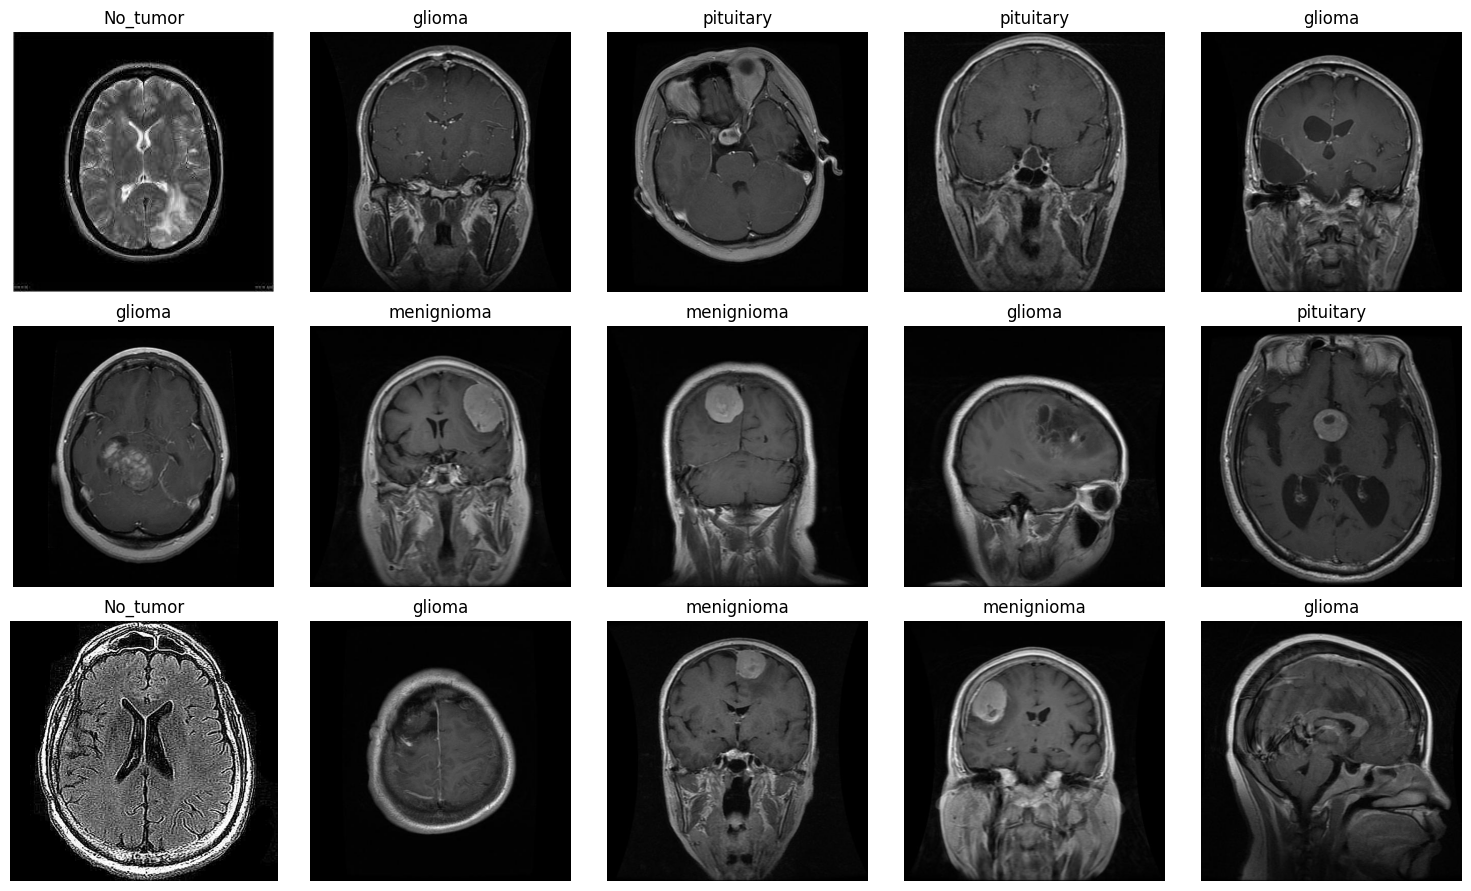

In [6]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def load_random_samples(dataframe, num_samples=15):
    # Randomly select num_samples indices from the dataframe
    random_indices = random.sample(range(len(dataframe)), num_samples)
    
    # Extract the file locations and labels for the randomly selected indices
    random_samples = dataframe.iloc[random_indices]
    
    images = []
    labels = []
    
    for index, row in random_samples.iterrows():
        image_path = row['location']
        label = row['labels']
        
        # Load the image using PIL
        image = Image.open(image_path)
        
        images.append(image)
        labels.append(label)
    
    return images, labels

def display_random_samples(images, labels):
    num_samples = len(images)
    
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    axes = axes.flatten()

    for i in range(num_samples):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(labels[i])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming connect_image_label is your DataFrame
random_images, random_labels = load_random_samples(connect_image_label)

# Now, display the random images
display_random_samples(random_images, random_labels)

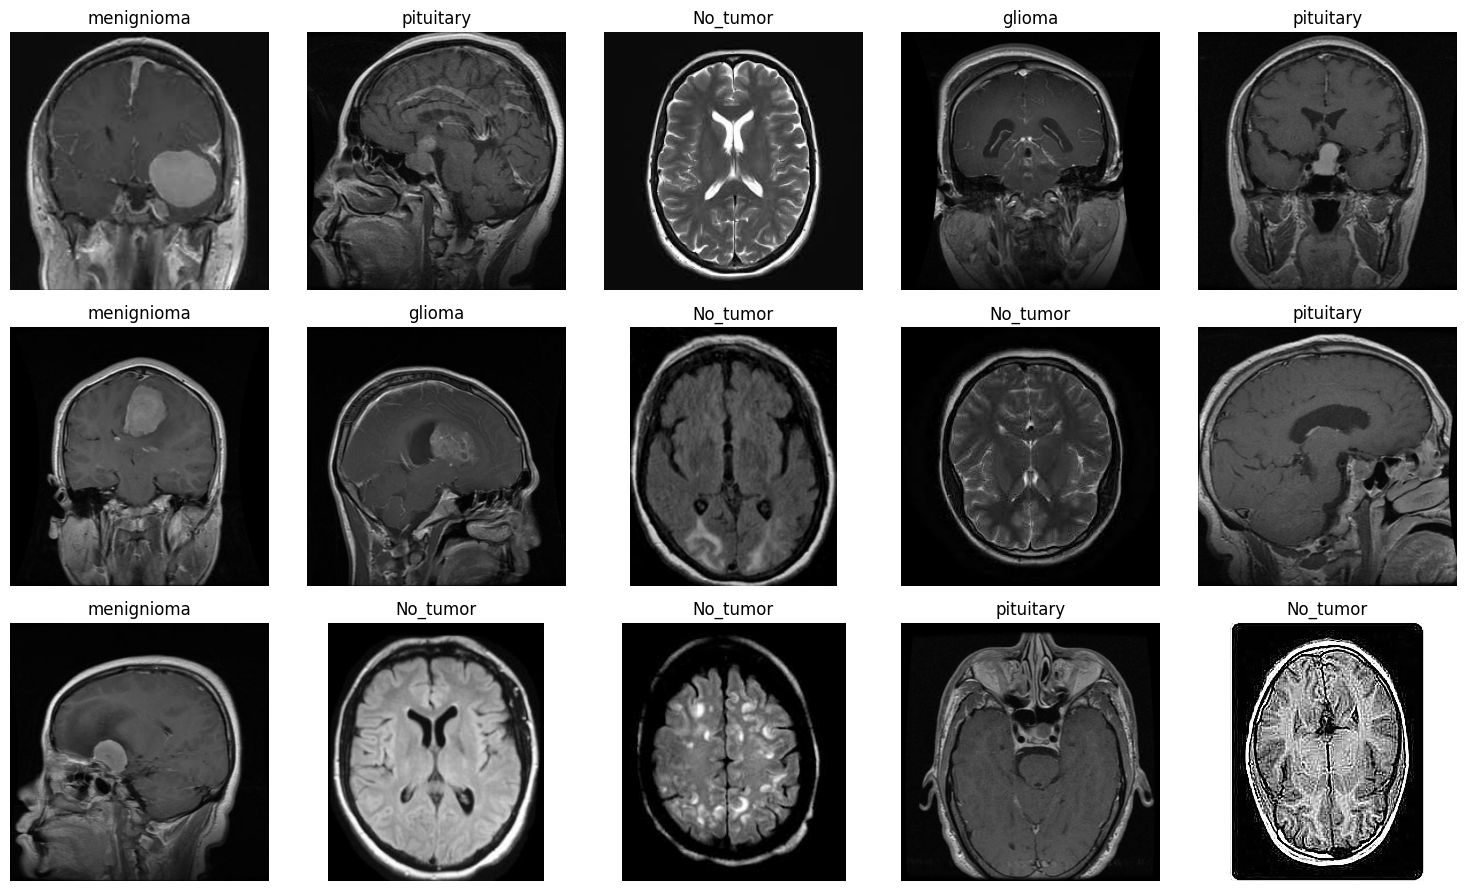

In [7]:
#for valid dataset
random_images, random_labels = load_random_samples(connect_image_label)

# Now, display the random images
display_random_samples(random_images, random_labels)

labels
menignioma    937
glioma        926
pituitary     901
No_tumor      396
Name: count, dtype: int64


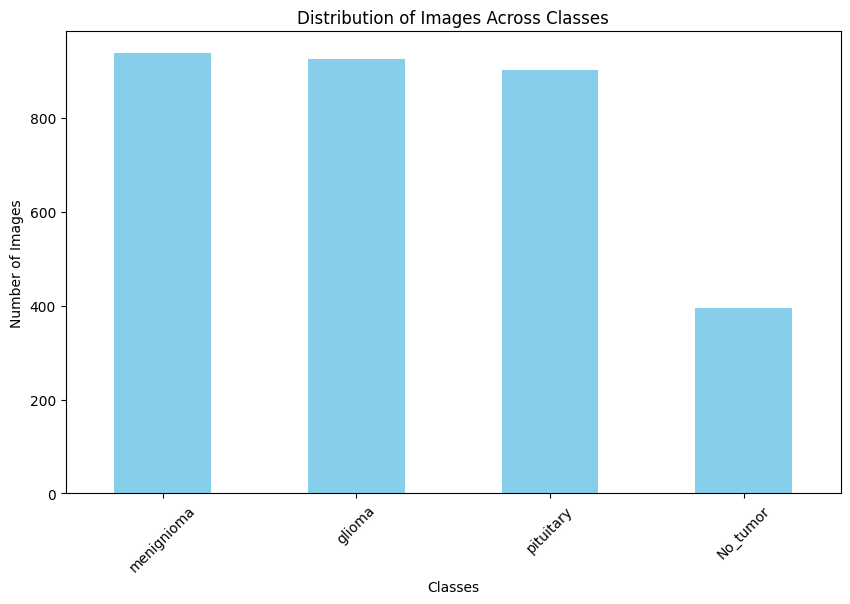

In [8]:
#for valid dataset
print(connect_image_label_test['labels'].value_counts())
# Assuming connect_image_label is your DataFrame
class_distribution = connect_image_label_test['labels'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Images Across Classes')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

labels
No_tumor      2000
pituitary     1757
menignioma    1645
glioma        1621
Name: count, dtype: int64


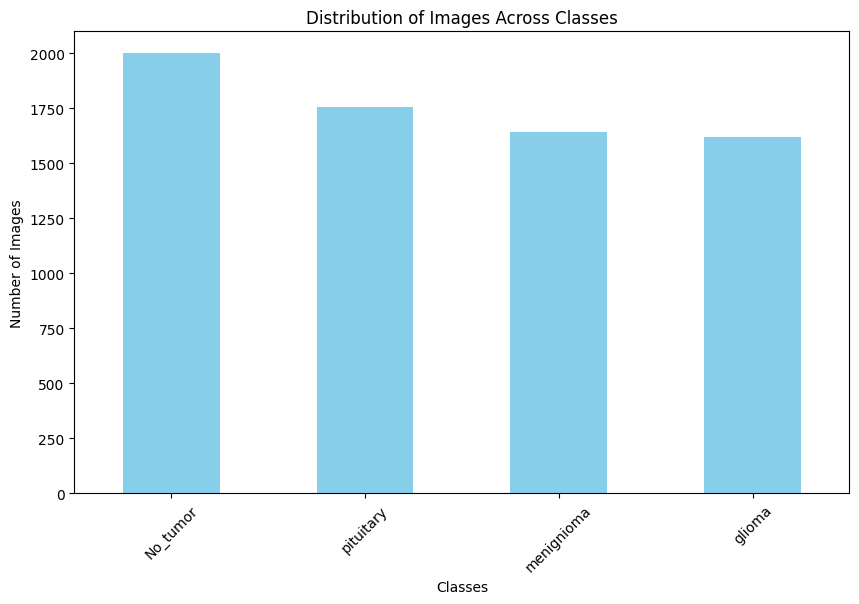

In [9]:
#training dataset
print(connect_image_label['labels'].value_counts())
# Assuming connect_image_label is your DataFrame
class_distribution = connect_image_label['labels'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Images Across Classes')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [10]:
#split the data to 3 part : train dataset, test dataset, validation data
train,valid = train_test_split(connect_image_label, train_size=0.8, random_state=3)

print(f"train set: {train.shape}")
print(f"validation set: {valid.shape}")

train set: (5618, 2)
validation set: (1405, 2)


In [11]:


train_image_datagen = ImageDataGenerator(rescale=1./255.)
test_image_datagen = ImageDataGenerator(rescale=1./255.)
valid_image_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
import numpy as np


train_datagen = train_image_datagen.flow_from_dataframe(train,
                                              x_col = 'location', y_col ='labels',
                                              target_size = (299,299),
                                              class_mode = 'categorical', shuffle = True)


validation_datagen = valid_image_datagen.flow_from_dataframe(valid,
                                            target_size=(299,299), x_col = 'location', y_col ='labels',
                                            class_mode='categorical',
                                            batch_size= 20, shuffle=True)
                                            

test_datagen = test_image_datagen.flow_from_dataframe(connect_image_label_test,
                                            target_size = (299,299), x_col = 'location', y_col ='labels',
                                             class_mode = 'categorical',
                                            batch_size = 15, shuffle = False)

Found 5618 validated image filenames belonging to 4 classes.
Found 1405 validated image filenames belonging to 4 classes.
Found 3160 validated image filenames belonging to 4 classes.


In [13]:
from keras.layers import concatenate, Input, Flatten, Dense
from keras.models import Model
from keras.applications  import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV3Large

# Define the input shape
input_shape = (299, 299, 3)
# Create one input for both x1 and x2
input_layer = Input(shape=input_shape)
# Create base models
base_model_1 = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_layer)
base_model_2 = MobileNetV3Large(weights='imagenet', include_top=False, input_tensor=input_layer)
# Freeze the layers of the base models
for layer in base_model_1.layers:
    layer.trainable = False
for layer in base_model_2.layers:
    layer.trainable = False
x1 = base_model_1.output
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)
x2 = base_model_2.output
x2 = Flatten()(x2)
x2 = Dense(128, activation='relu')(x2)
# Combine the outputs of the two base models
merged = concatenate([x1, x2])
x = BatchNormalization()(merged)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

# Create the combined model
combined_model = Model(inputs=input_layer, outputs=output)

# Display the model summary
combined_model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 299, 299, 3)          0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 150, 150, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 150, 150, 16)         64        ['Conv[0][0]']                
 lization)                                                                                  

In [14]:
combined_model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001),  metrics= ['categorical_accuracy'])
history = combined_model.fit(train_datagen, validation_data = validation_datagen, epochs = 30)

Epoch 1/30


176/176 [==============================] - 298s 2s/step - loss: 0.4880 - categorical_accuracy: 0.8282 - val_loss: 0.2780 - val_categorical_accuracy: 0.8954
Epoch 2/30
176/176 [==============================] - 348s 2s/step - loss: 0.2446 - categorical_accuracy: 0.9138 - val_loss: 0.1787 - val_categorical_accuracy: 0.9374
Epoch 3/30
176/176 [==============================] - 341s 2s/step - loss: 0.1762 - categorical_accuracy: 0.9391 - val_loss: 0.1584 - val_categorical_accuracy: 0.9488
Epoch 4/30
176/176 [==============================] - 344s 2s/step - loss: 0.1345 - categorical_accuracy: 0.9539 - val_loss: 0.1553 - val_categorical_accuracy: 0.9395
Epoch 5/30
176/176 [==============================] - 348s 2s/step - loss: 0.0967 - categorical_accuracy: 0.9689 - val_loss: 0.1305 - val_categorical_accuracy: 0.9509
Epoch 6/30
176/176 [==============================] - 350s 2s/step - loss: 0.0784 - categorical_accuracy: 0.9776 - val_loss: 0.1271 - val_categorical_accuracy: 0.9

In [15]:
combined_model_final = combined_model  # Get model (Sequential, Functional Model, or Model subclass)
combined_model_final.save('combined_model_21_1.keras')  # The file needs to end with the .keras extension

In [16]:
model_combine_final = keras.models.load_model('combined_model_21_1.keras')

In [17]:
test_loss, test_accuracy = model_combine_final.evaluate(test_datagen)

211/211 [==============================] - 71s 328ms/step - loss: 0.2690 - categorical_accuracy: 0.9380


In [18]:
np.save('combined_model_21_1.npy',history.history)

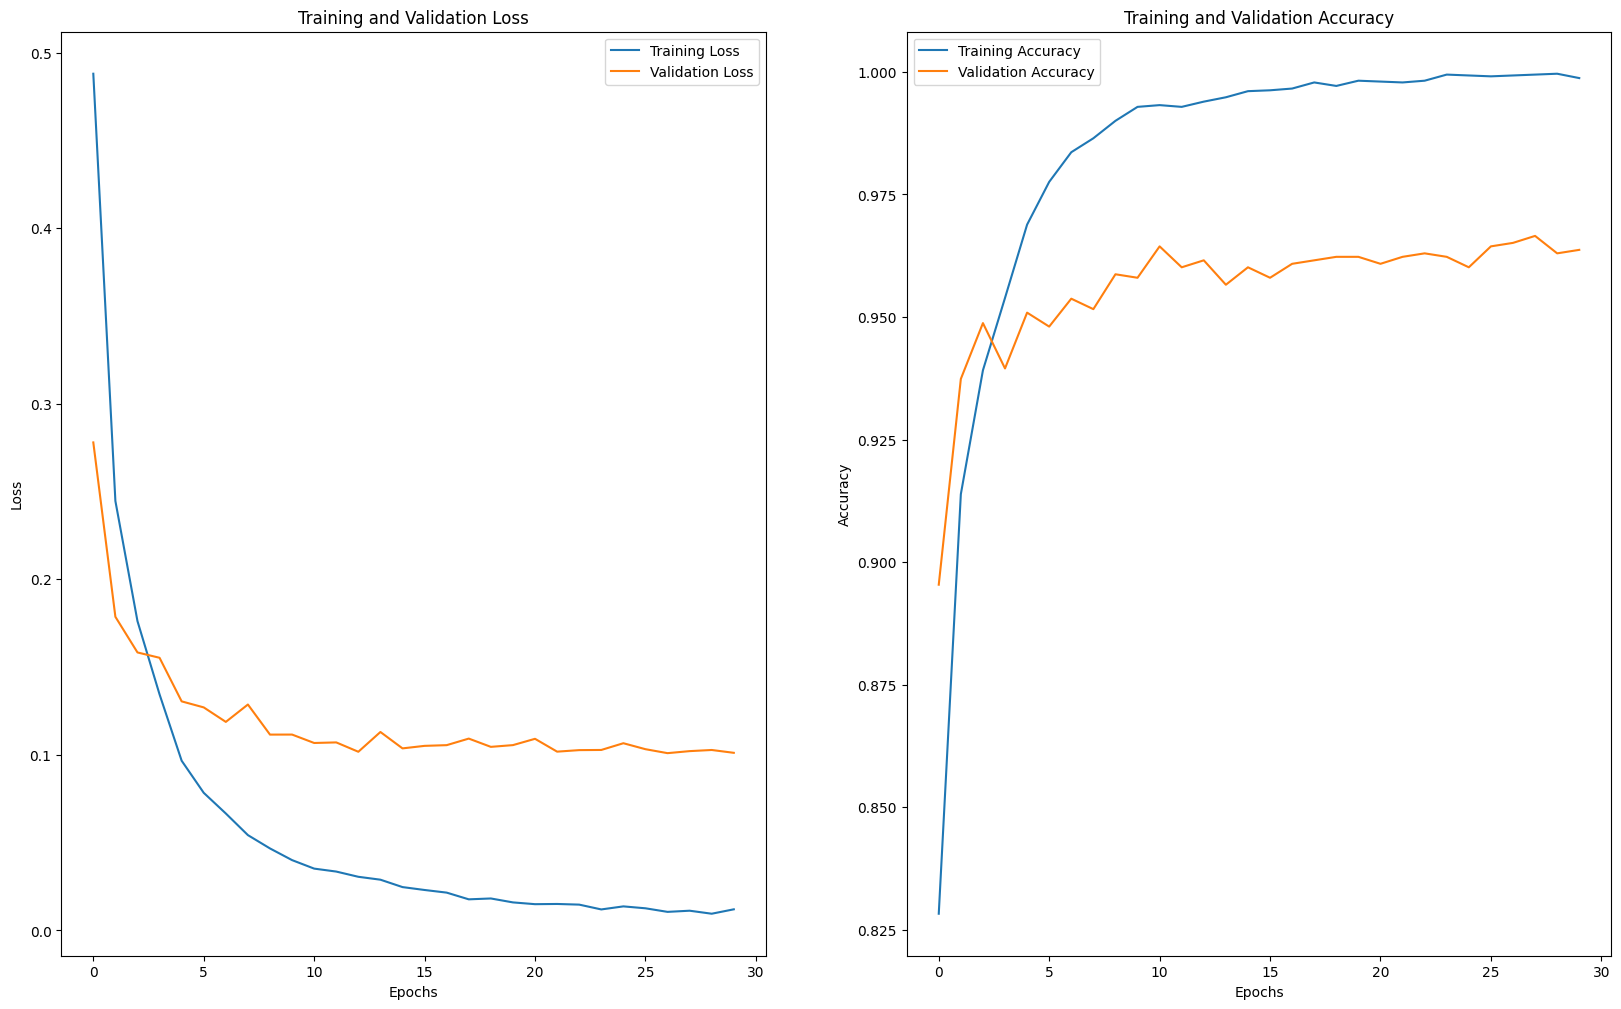

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Load the history dictionary from the file
history = np.load('combined_model_21_1.npy', allow_pickle=True).item()

# Plot loss and accuracy curves
plt.figure(figsize=(20, 12))
# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history['val_categorical_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [22]:
combined_model_final = combined_model  # Get model (Sequential, Functional Model, or Model subclass)
combined_model_final.save('combined_model_21_1.h5')  # The file needs to end with the .keras extension


In [23]:
def predict_combined_model(model, image_path):
    # Load an image for prediction
    img = image.load_img(image_path, target_size=(299, 299))  # Adjust target_size based on your input shape
    img_array = image.img_to_array(img)
    # Rescale the image array by multiplying by 1.255
    img_array = img_array * 1.255

    # Preprocess the image based on the model requirements
    img_array = np.expand_dims(img_array, axis=0)


    # Make predictions
    predictions = model.predict(img_array)

    # Decode predictions
    class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
    predicted_class = class_labels[np.argmax(predictions)]

    return predicted_class

In [29]:
file_path = "C:/Users/Admin/Downloads/thesis/dataset/Training/meningioma/Tr-me_0851.jpg"
result = predict_combined_model(combined_model_final,file_path)
print(result)

1/1 [==============================] - 0s 57ms/step
glioma
